In [1]:
#imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
import os

In [2]:
def upload_image():
    """Upload an image file to Colab"""
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename
    return None

In [75]:
#Upload your image
print("Please upload your image file:")
input_filename = upload_image()


if not input_filename:
    raise ValueError("No image file was uploaded")


Please upload your image file:


Saving Low_scene-bw.jpg to Low_scene-bw.jpg


In [76]:
# Read the image
img = cv2.imread(input_filename)
if img is None:
    raise ValueError("Could not read the image file")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

In [77]:
# Method 1: Simple RGB channel-wise equalization (not recommended)
def channel_wise_hist_eq(image):
    """Apply histogram equalization to each channel separately"""
    channels = cv2.split(image)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))
    return cv2.merge(eq_channels)

In [78]:
# Method 2: Convert to HSV and equalize only V channel (better)
def hsv_hist_eq(image):
    """Convert to HSV space and equalize only Value channel"""
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    v_eq = cv2.equalizeHist(v)
    hsv_eq = cv2.merge([h, s, v_eq])
    return cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

In [79]:
# Method 3: CLAHE in LAB color space (best method)
def clahe_hist_eq(image):
    """Apply CLAHE to L-channel in LAB color space"""
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to L-channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l_eq = clahe.apply(l)

    lab_eq = cv2.merge([l_eq, a, b])
    return cv2.cvtColor(lab_eq, cv2.COLOR_LAB2RGB)

In [80]:
# Apply all methods
rgb_eq = channel_wise_hist_eq(img)
hsv_eq = hsv_hist_eq(img)
clahe_eq = clahe_hist_eq(img)

In [81]:
# Save all results
output_files = {
    'original.jpg': cv2.cvtColor(img, cv2.COLOR_RGB2BGR),
    'rgb_equalized.jpg': cv2.cvtColor(rgb_eq, cv2.COLOR_RGB2BGR),
    'hsv_equalized.jpg': cv2.cvtColor(hsv_eq, cv2.COLOR_RGB2BGR),
    'clahe_equalized.jpg': cv2.cvtColor(clahe_eq, cv2.COLOR_RGB2BGR)
}

for filename, image in output_files.items():
    cv2.imwrite(filename, image)

In [82]:
# Display results
plt.figure(figsize=(20, 12))


<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<ipython-input-83-b3cf13bc49bc>:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


(0.0, 256.0)

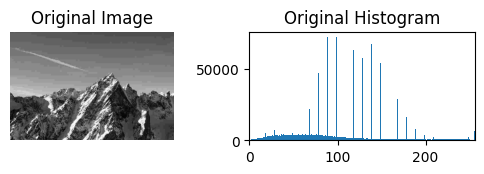

In [83]:
# Original Image
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Original Histogram')
plt.xlim([0, 256])

<ipython-input-84-ed8d28bffc98>:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(rgb_eq.ravel(), 256, [0, 256])


(0.0, 256.0)

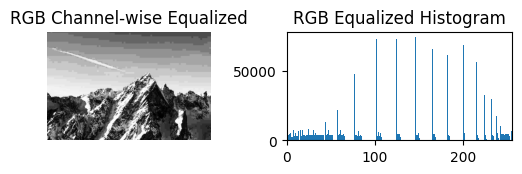

In [84]:
# RGB Equalized
plt.subplot(3, 2, 3)
plt.imshow(rgb_eq)
plt.title('RGB Channel-wise Equalized')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(rgb_eq.ravel(), 256, [0, 256])
plt.title('RGB Equalized Histogram')
plt.xlim([0, 256])

<ipython-input-85-0799b53f2db4>:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(hsv_eq.ravel(), 256, [0, 256])


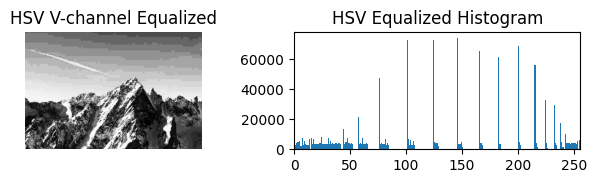

In [85]:
# HSV Equalized
plt.subplot(3, 2, 5)
plt.imshow(hsv_eq)
plt.title('HSV V-channel Equalized')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(hsv_eq.ravel(), 256, [0, 256])
plt.title('HSV Equalized Histogram')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

<ipython-input-86-782e7557d229>:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(clahe_eq.ravel(), 256, [0, 256])


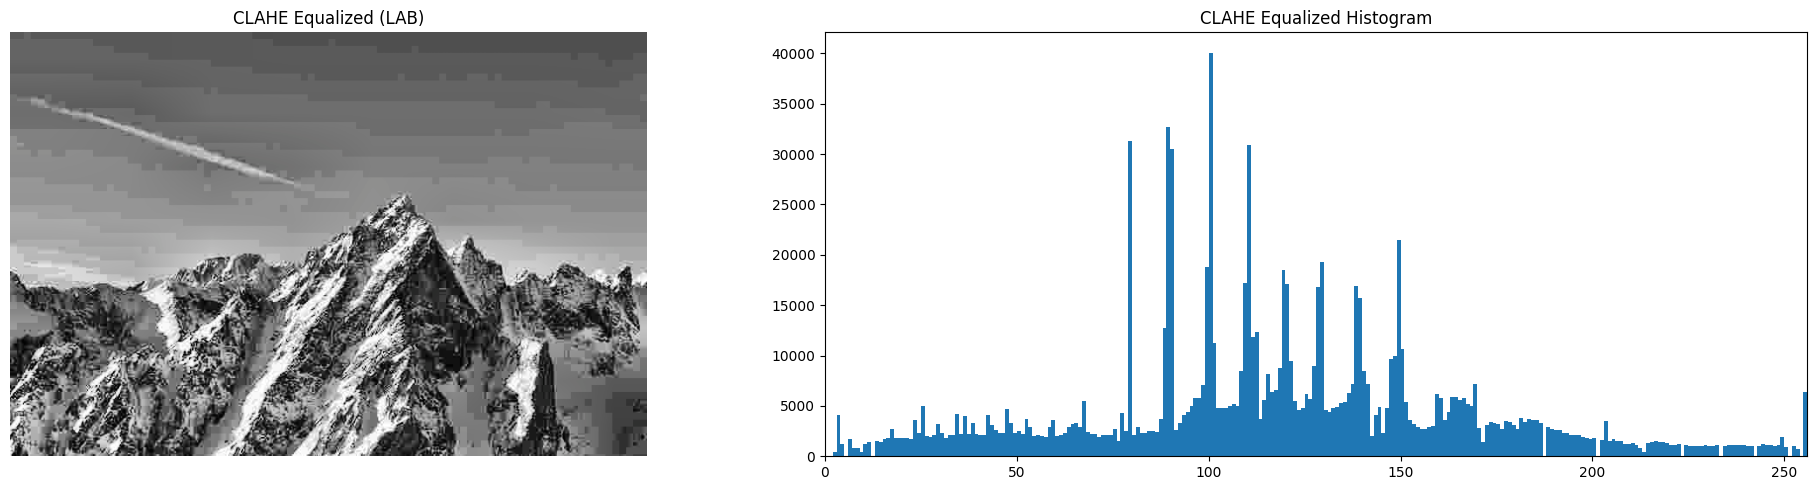

In [86]:
# CLAHE Equalized
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.imshow(clahe_eq)
plt.title('CLAHE Equalized (LAB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(clahe_eq.ravel(), 256, [0, 256])
plt.title('CLAHE Equalized Histogram')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


In [87]:
# Download the results
print("\nOutput files created:")
for filename in output_files.keys():
    print(f"- {filename}")

print("\nYou can download these files from the Colab file browser on the left")


Output files created:
- original.jpg
- rgb_equalized.jpg
- hsv_equalized.jpg
- clahe_equalized.jpg

You can download these files from the Colab file browser on the left
